In [1]:
%matplotlib widget

import os
import sys
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath("/develop/code/evaluation"))
import eval_methods as em

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


Using MPI version 4.0, 1 processes


Global seed set to 1337


## Begin post-training processes. First, choose a folder:

In [2]:
path_results = "/develop/results"
folder_name = "model_baseline" # this is where we send loss.csv, params.yaml and the folders valid_info, train_info

## 1. Evaluate loss.

dict_keys(['alpha', 'delta', 'gamma', 'lr', 'title', 'loss'])


1

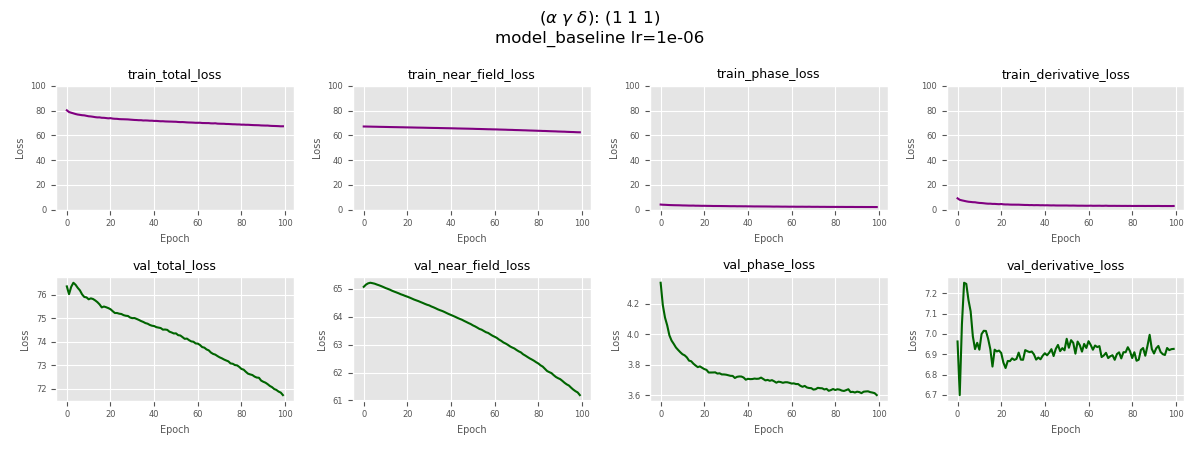

In [12]:
# alpha - near field, gamma - phase, delta - derivatives

folder_path = os.path.join(path_results, folder_name)
single_loss = em.gather_loss(folder_path)
#all_loss = em.gather_all_loss(path_results, backbone="resnet18")

l_string = r'($\alpha$' + " " + r'$\gamma$' + " " + r'$\delta$)'
title = l_string + f": ({single_loss['alpha']} {single_loss['delta']} {single_loss['gamma']}) " + "\n" + single_loss['title'].replace(path_results,"").replace("/","") + " lr=" + str(single_loss['lr'])

# plt.close("all")

em.plot_loss(single_loss['loss'], title, save_fig=False)
print(single_loss.keys())
single_loss['alpha']

## 2. Evaluate other metrics

In [13]:
encoder_train_results, encoder_valid_results = em.get_results(folder_name, "encoder.pkl")
resim_train_results, resim_valid_results = em.get_results(folder_name, "resim.pkl")
recon_train_results, recon_valid_results = em.get_results(folder_name, "recon.pkl")

In [14]:
folder_name

'model_baseline'

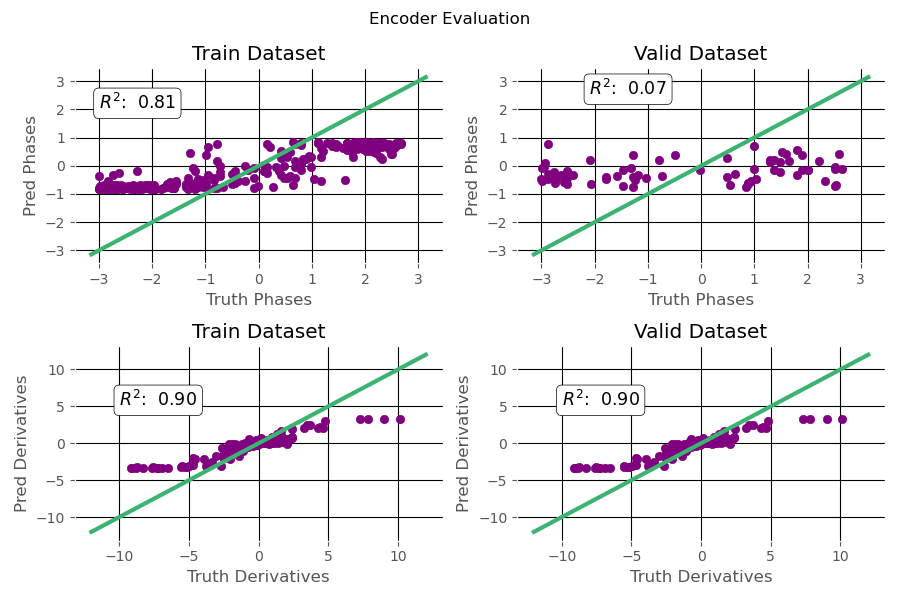

In [15]:
plt.close("all")

em.get_regression_plots(encoder_train_results, encoder_valid_results, title = "Encoder", save_fig=False)

In [ ]:
plt.close("all")

em.box_plots(recon_train_results['nf_amp_diff'], recon_train_results['nf_angle_diff'], 
             recon_train_results['ff_amp_diff'], recon_train_results['ff_angle_diff'], 
             'Train Dataset', savefig=True)
em.box_plots(recon_valid_results['nf_amp_diff'], recon_valid_results['nf_angle_diff'], 
             recon_valid_results['ff_amp_diff'], recon_valid_results['ff_angle_diff'], 
             'Valid Dataset', savefig=True)

In [ ]:
##### get near field truth, recon, and resim values ####

nf_truth_train = resim_train_results['nf_truth']
nf_truth_valid = resim_valid_results['nf_truth']

nf_recon_train = resim_train_results['nf_pred']
nf_recon_valid = resim_valid_results['nf_pred']

nf_resim_train = em.get_nf_resim(folder_name, target = 'train')
nf_resim_valid = em.get_nf_resim(folder_name, target = 'valid')

###### get far field truth, recon, and resim values ####

ff_truth_train = resim_train_results['ff_truth']
ff_truth_valid = resim_valid_results['ff_truth']

ff_recon_train = resim_train_results['ff_pred']
ff_recon_valid = resim_valid_results['ff_pred']

ff_resim_train = em.get_ff_resim(nf_resim_train)
ff_resim_valid = em.get_ff_resim(nf_resim_valid)

In [ ]:
plt.close("all")

similarity = True
amplitude_matrix, phase_matrix = em.build_custom_conf_matrices(nf_truth_train, nf_recon_train, 
                                                             nf_resim_train, similarity = similarity, savefig=True)
em.plot_custom_confusion_matrix(amplitude_matrix, phase_matrix, similarity=similarity, savefig=True)

In [ ]:
plt.close("all")

similarity = False
amplitude_matrix, phase_matrix = em.build_custom_conf_matrices(nf_truth_train, nf_recon_train, 
                                                             nf_resim_train, similarity = similarity)
em.plot_custom_confusion_matrix(amplitude_matrix, phase_matrix, similarity=similarity, savefig=True)

In [ ]:
plt.close("all")       
em.plot_dft_fields(nf_truth_train, nf_recon_train, nf_resim_train, 
           target = "Near Field, Train Dataset", batch=True, savefig = True)

In [ ]:
plt.close("all")
em.plot_dft_fields(nf_truth_valid, nf_recon_valid, nf_resim_valid, "Near Field, Valid Dataset", batch=True, savefig=True)

In [ ]:
plt.close("all")
em.plot_dft_fields(ff_truth_train, ff_recon_train, ff_resim_train, "Far Field, Train Dataset", batch=True, savefig=True)

In [ ]:
plt.close("all")
em.plot_dft_fields(ff_truth_valid, ff_recon_valid, ff_resim_valid, "Far Field, Valid Dataset", batch=True, savefig=True)

In [ ]:
plt.close("all")
em.plot_dft_fields(nf_truth_train, nf_recon_train, nf_resim_train, "Near Field, Train Dataset", batch=False, idx=0, savefig=True)

In [ ]:
plt.close("all")
em.plot_dft_fields(nf_truth_valid, nf_recon_valid, nf_resim_valid, "Near Field, Valid Dataset", batch=False, idx=6, savefig=True)

In [ ]:
plt.close("all")
em.plot_dft_fields(ff_truth_train, ff_recon_train, ff_resim_train, "Far Field, Train Dataset", batch=False, idx=0, savefig=True)

In [ ]:
plt.close("all")
em.plot_dft_fields(ff_truth_valid, ff_recon_valid, ff_resim_valid, "Far Field, Valid Dataset", batch=False, idx=0, savefig=True)